In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def generateLinearTrajectory(t, x0 = 100, vy = 100, h = 20):
    return np.sqrt(x0**2+(vy*t)**2+h**2)

def SSE(y_true, y_hat):
    return sum(y_true - y_hat)**2

class history:
    def __init__(self):
        self.x0 = []
        self.h = []
        self.vy = []
        self.loss = []
    def plotHistory(self):
        plt.figure()
        plt.plot(self.x0)
        plt.plot(self.h)
        plt.plot(self.vy)
        plt.legend(['xo','h','vy'])


        plt.figure()
        plt.plot(self.loss[100:])
        plt.show()


# Single channel

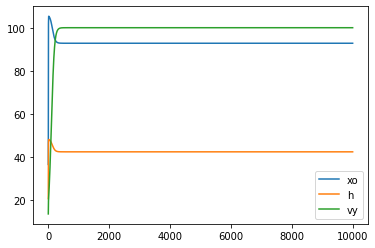

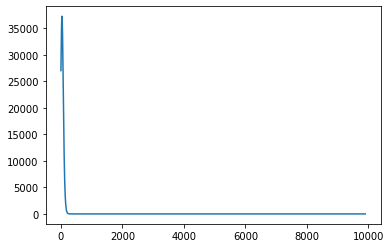

x0: 92.77979060715231  h: 42.33096331165871 vy: 99.99999999999964


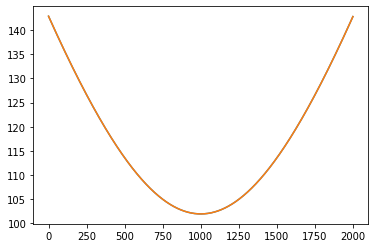

In [126]:
# model
def f(t, x0, vy, h):
    return np.sqrt(x0**2+(vy*t)**2+h**2)

def df_by_dx0(x0, y_true, y_hat, vy, t, h):
    return sum((2*x0*(y_true-y_hat))/f(t,x0,vy,h))

def df_by_dh(x0, y_true, y_hat, vy, t, h):
    return sum((2*h*(y_true-y_hat))/f(t,x0,vy,h))

def df_by_dvy(x0, y_true, y_hat, vy, t, h):
    return sum((2*vy*t**2*(y_true-y_hat))/f(t,x0,vy,h))

# scene
t = np.arange(-1,1,1e-3)
R_ch1 = generateLinearTrajectory(t, x0 = 100, vy = 100, h = 20)

# initiallizae
x0 = 10
vy = 10
h = 10

# hiperparameter
lr = 0.0001
y_true_ch1 = R_ch1

fithistory = history()

for _ in range(10000):
    # ch1
    y_hat = f(t, x0, vy, h)
    x0 += lr*df_by_dx0(x0, y_true_ch1, y_hat, vy, t, h)
    h += lr*df_by_dh(x0, y_true_ch1, y_hat, vy, t, h)
    vy += lr*df_by_dvy(x0, y_true_ch1, y_hat, vy, t, h)
    fithistory.x0.append(x0)
    fithistory.h.append(h)
    fithistory.vy.append(vy)
    fithistory.loss.append(SSE(y_hat,y_true_ch1))

fithistory.plotHistory()
print(f"x0: {x0}  h: {h} vy: {vy}")
plt.plot(R_ch1)
plt.plot(f(t,x0,vy,h))
plt.show()

# 2 channels

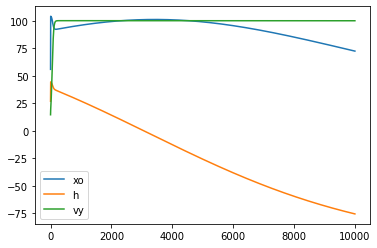

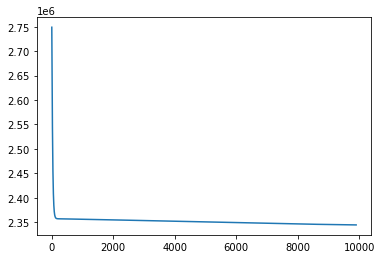

x0: 72.37248635052325  h: -75.63253521376282 vy: 99.95689519365591


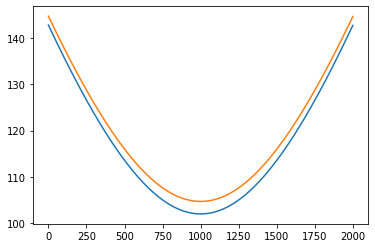

In [253]:
# model
def f(t, x0, vy, h):
    return np.sqrt(x0**2+(vy*t)**2+h**2)

def df_by_dx0(x0, y_true, y_hat, vy, t, h):
    return sum((2*x0*(y_true-y_hat))/f(t,x0,vy,h))

def df_by_dh(x0, y_true, y_hat, vy, t, h):
    return sum((2*h*(y_true-y_hat))/f(t,x0,vy,h))

def df_by_dvy(x0, y_true, y_hat, vy, t, h):
    return sum((2*vy*t**2*(y_true-y_hat))/f(t,x0,vy,h))

# scene
t = np.arange(-1,1,1e-3)
R_ch1 = generateLinearTrajectory(t, x0 = 100, vy = 100, h = 20)

h_ch2 = 5
R_ch2 = generateLinearTrajectory(t, x0 = 100, vy = 100, h = 2+h_ch2)

# initiallizae
x0 = 10
vy = 10
h = 10

# hiperparameter
lr = 0.0001
y_true_ch1 = R_ch1
y_true_ch2 = R_ch2
R0 = 100

fithistory = history()

for _ in range(10000):
    # ch1
    y_hat = f(t, x0, vy, h)
    # x0 += lr*df_by_dx0(x0, y_true_ch1, y_hat, vy, t, h)
    # h += lr*df_by_dh(x0, y_true_ch1, y_hat, vy, t, h)
    # vy += lr*df_by_dvy(x0, y_true_ch1, y_hat, vy, t, h)
    # fithistory.x0.append(x0)
    # fithistory.h.append(h)
    # fithistory.vy.append(vy)

    # ch2
    y_hat = f(t, x0, vy, h+h_ch2)
    x0 += lr*df_by_dx0(x0, y_true_ch2, y_hat, vy, t, h+h_ch2) + lr*df_by_dx0(x0, y_true_ch1, y_hat, vy, t, h)
    h += lr*df_by_dh(x0, y_true_ch2, y_hat, vy, t, h+h_ch2) + lr*df_by_dh(x0, y_true_ch1, y_hat, vy, t, h)
    vy += lr*df_by_dvy(x0, y_true_ch2, y_hat, vy, t, h+h_ch2) + lr*df_by_dvy(x0, y_true_ch1, y_hat, vy, t, h)
    fithistory.x0.append(x0)
    fithistory.h.append(h)
    fithistory.vy.append(vy)

    fithistory.loss.append(SSE(y_hat,y_true_ch1))

fithistory.plotHistory()
print(f"x0: {x0}  h: {h} vy: {vy}")
plt.plot(R_ch1)
plt.plot(f(t,x0,vy,h))
plt.show()

# 3 channels

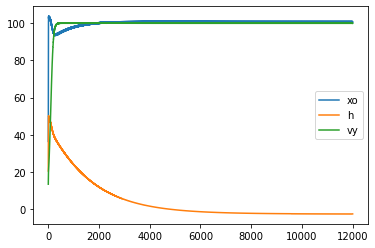

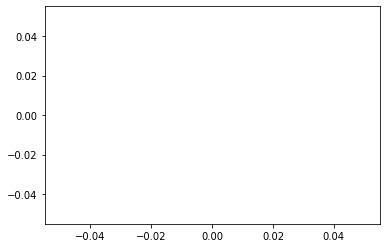

x0: 100.47776372229622  h: -2.4558050516455823 vy: 99.93261412465945


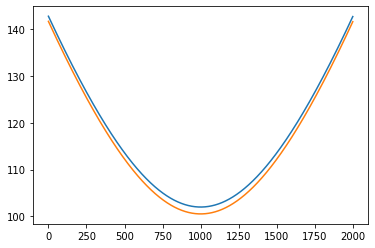

In [43]:
# model
def f(t, x0, vy, h):
    return np.sqrt(x0**2+(vy*t)**2+h**2)

def df_by_dx0(x0, y_true, y_hat, vy, t, h):
    return sum((2*x0*(y_true-y_hat))/f(t,x0,vy,h))

def df_by_dh(x0, y_true, y_hat, vy, t, h):
    return sum((2*h*(y_true-y_hat))/f(t,x0,vy,h))

def df_by_dvy(x0, y_true, y_hat, vy, t, h):
    return sum((2*vy*t**2*(y_true-y_hat))/f(t,x0,vy,h))

# scene
t = np.arange(-1,1,1e-3)
R_ch1 = generateLinearTrajectory(t, x0 = 100, vy = 100, h = 20)

h_ch2 = 5
R_ch2 = generateLinearTrajectory(t, x0 = 100, vy = 100, h = 2+h_ch2)

h_ch3 = -5
R_ch3 = generateLinearTrajectory(t, x0 = 100, vy = 100, h = 2+h_ch2)

# initiallizae
x0 = 10
vy = 10
h = 10

# hiperparameter
lr = 0.0001
y_true_ch1 = R_ch1
y_true_ch2 = R_ch2

fithistory = history()

for _ in range(4000):
    # ch1
    y_hat = f(t, x0, vy, h)
    x0 += lr*df_by_dx0(x0, y_true_ch1, y_hat, vy, t, h)
    h += lr*df_by_dh(x0, y_true_ch1, y_hat, vy, t, h)
    vy += lr*df_by_dvy(x0, y_true_ch1, y_hat, vy, t, h)
    fithistory.x0.append(x0)
    fithistory.h.append(h)
    fithistory.vy.append(vy)

    # ch2
    y_hat = f(t, x0, vy, h+h_ch2)
    x0 += lr*df_by_dx0(x0, y_true_ch2, y_hat, vy, t, h+h_ch2)
    h += lr*df_by_dh(x0, y_true_ch2, y_hat, vy, t, h+h_ch2)
    vy += lr*df_by_dvy(x0, y_true_ch2, y_hat, vy, t, h+h_ch2)
    fithistory.x0.append(x0)
    fithistory.h.append(h)
    fithistory.vy.append(vy)

    # ch3
    y_hat = f(t, x0, vy, h+h_ch3)
    x0 += lr*df_by_dx0(x0, y_true_ch2, y_hat, vy, t, h+h_ch3)
    h += lr*df_by_dh(x0, y_true_ch2, y_hat, vy, t, h+h_ch3)
    vy += lr*df_by_dvy(x0, y_true_ch2, y_hat, vy, t, h+h_ch3)
    fithistory.x0.append(x0)
    fithistory.h.append(h)
    fithistory.vy.append(vy)

fithistory.plotHistory()
print(f"x0: {x0}  h: {h} vy: {vy}")
plt.plot(R_ch1)
plt.plot(f(t,x0,vy,h))
plt.show()

# loss vs h-x0 space

In [116]:
x0 = 100
h = 20

h_space = np.arange(-100,100)
x0_space = np.arange(-100,200)

In [117]:
loss = np.zeros(shape=(len(h_space),len(x0_space)))

for i in range(len(h_space)):
    for j in range(len(x0_space)):
        loss[i][j] = SSE(f(t,x0_space[j],100,h_space[i]),f(t,x0,100,h))

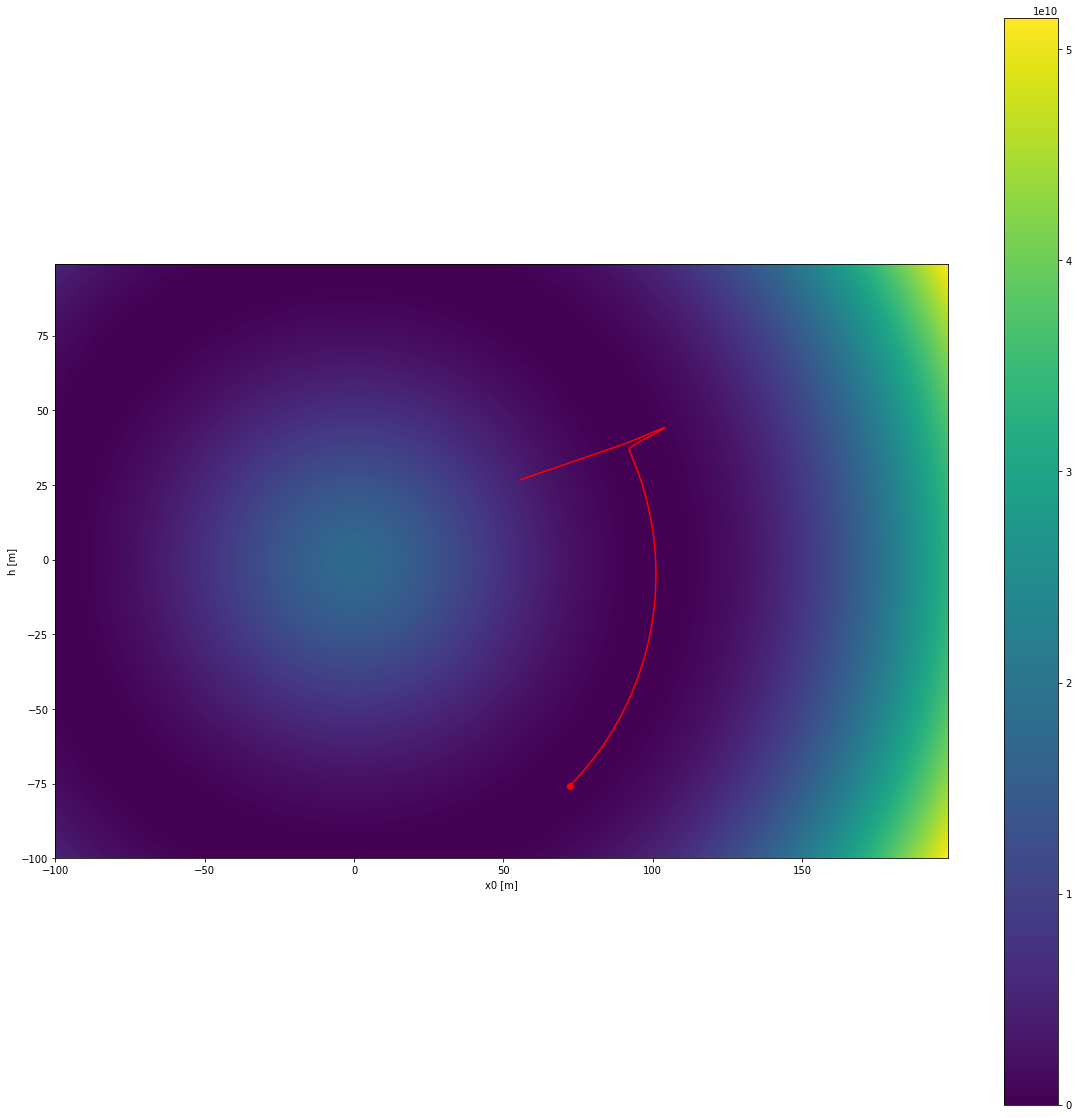

In [125]:
plt.figure(figsize=(20,20))
ax = plt.gca()
plt.imshow(loss,extent=[np.min(x0_space),np.max(x0_space),np.min(h_space),np.max(h_space)])
plt.plot(x0,h,'or')
plt.plot(fithistory.x0, fithistory.h,'r')
plt.colorbar()
plt.xlabel("x0 [m]")
plt.ylabel("h [m]")
plt.show()

# regularyzacja x0

In [127]:
np.sqrt(10**2+100**2)

100.4987562112089

In [129]:
np.sqrt(50**2+100**2)

111.80339887498948

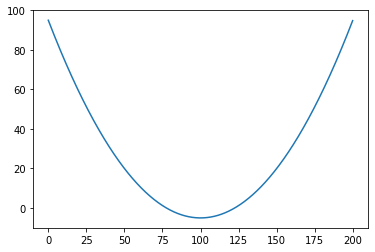

In [241]:
R0 = 100 - 100
x = np.arange(0,200,0.1)

y = 0.01*(x-R0)**2 + -2*(x-R0) + 95
# y[y<0] = 0
# y[y>20] = 20

plt.plot(x, y)

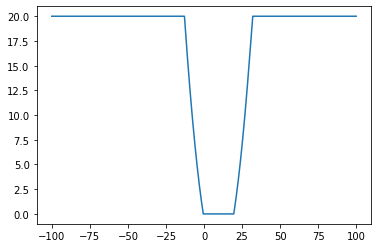

In [214]:
R0 = 10
x = np.arange(-100,100,0.1)
y = 0.05*(x-R0)**2 + 0.05*(x-R0) - 5
y[y<0] = 0
y[y>20] = 20

plt.plot(x, y)

In [217]:
R0 = 100
x = 30
y = 0.05*(x-R0)**2 + 0.05*(x-R0) - 5
if y < 0:
    return 0
if y > 20:
    return 20
else:
    return y
# y[y<0] = 0
# y[y>20] = 20
y

236.5

In [244]:
def xRegularization(x, R0):
    y = 0.05*(x-R0)**2 + 0.05*(x-R0) - 5
    return y

def dxRegularization(x, R0):
    y = 0.05*(x-R0)*2 + 0.05
    return y

In [233]:
xRegularization(4, 20)

7.0

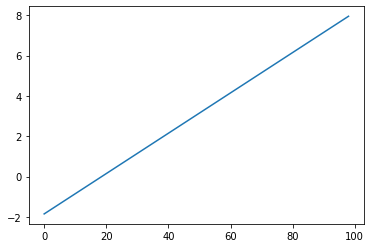

In [255]:
plt.plot(dxRegularization(np.arange(1,100), 20))